<a href="https://colab.research.google.com/github/harshininandigama/HDS5210_InClass/blob/master/FINAL/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**"ANALYSING THE IMPACT OF SMOKING ON ASTHMA AND OBESITY"**



OVERVIEW

From this analysis we can understanding the relationship among smoking habits, asthma prevalence, and obesity rates in various states of United States, covering the period from 1996 to 2000. The main reason for selecting this topic is as the asthma, obesity levels are being affected by tobbaco consumption which is leading issue in United States. So, i have selected these datasets to explore correlations smong these datasets as these are critical public health factors. These insights from analysis helps in improving public health outcomes by informing health policies and also aiming at interventions.

 I have collected 3 Datsets, Tobacco Dataest was sourced from Kaggle (U.S. Tobacco Use Data (1995-2010)). This dataset gives us information on tobacco use across different states in United States, including their annual trends. This is the link to access dataset  https://www.kaggle.com/datasets/thedevastator/u-s-tobacco-use-data-1995-2010.

Asthma prevalence data was collected from portal California Health and Human Services (CalHHS). This dataset has details on asthma rates across states in United States and include demographic breakdowns. This is the link to access dataset https://data.chhs.ca.gov/nb_NO/dataset/asthma-prevalence/resource/d782d003-8041-4a8e-ad83-ff996ed4443f. This information is essential for understanding the respiratory issues which are linked to smoking.

Obesity rates were collected from AmeriGEOSS. This is the link to access dataset https://data.amerigeoss.org/dataset/national-obesity-by-state. Obesity is a key indicator of health trends and it is linked to smoking and physical inactivity.

By integrating these three datasets, i will analyze and study patterns which helps in shaping  public health initiatives effectively. Understanding these relationships is very much important to address the challenges.

OBJECTIVE

The main objective of this study is


1.   Understand the relationship between smoking and its potential impacts on asthma prevalence and obesity rates.

2.   Aggregate and analyze health data across states and years to identify significant patterns.
3.   Visualize trends and correlations using various data visualization techniques.






LOADING SMOKING DATAEST

This code imports pandas, loads a smoking dataset from a CSV file, and displays the first few rows for review.

In [43]:
# Import libraries
import pandas as pd

# Load Smoking dataset
smoking_path = '/content/smoking tobacco.csv'
smoking_data = pd.read_csv(smoking_path)

# Display loaded dataset
print("Loaded Smoking Dataset:")
print(smoking_data.head(), "\n")

Loaded Smoking Dataset:
   index  Year        State Smoke everyday Smoke some days Former smoker  \
0      0  1996  Puerto Rico           9.4%            5.1%           16%   
1      1  1997  Puerto Rico           9.4%              5%         15.7%   
2      2  1998  Puerto Rico          10.1%            5.2%         16.8%   
3      3  1999  Puerto Rico           9.7%              4%         15.3%   
4      4  2000  Puerto Rico           9.2%            3.9%         15.2%   

  Never smoked     Location 1  
0        69.5%  Puerto Rico\n  
1        69.9%  Puerto Rico\n  
2        67.9%  Puerto Rico\n  
3          71%  Puerto Rico\n  
4        71.6%  Puerto Rico\n   



In [44]:
# test case
try:
    smoking_data = pd.read_csv(smoking_path)
    print("Test 1 Passed: Dataset loaded successfully.")
except Exception as e:
    print(f"Test 1 Failed: {e}")

Test 1 Passed: Dataset loaded successfully.


CLEANING SMOKING DATSET

This step converts percentage strings in specific columns of the smoking dataset (e.g., "Smoke everyday" and "Never smoked") to numeric values. Initially, the data is stored as strings with a "%" symbol, which cannot be used directly for calculations or statistical analysis. By removing the "%" symbol and converting the values to float, we enable accurate numerical operations such as comparisons, aggregations, and visualizations. This preprocessing is essential for tasks like identifying trends, calculating averages, or correlating smoking rates with other variables. Cleaning the dataset in this way ensures consistency and reliability for further analysis and

In [45]:
# Convert percentage strings to numeric
smoking_columns = ['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']
for col in smoking_columns:
    smoking_data[col] = smoking_data[col].str.rstrip('%').astype(float)

# Display cleaned dataset
print("Cleaned Smoking Dataset:")
print(smoking_data.head(), "\n")

Cleaned Smoking Dataset:
   index  Year        State  Smoke everyday  Smoke some days  Former smoker  \
0      0  1996  Puerto Rico             9.4              5.1           16.0   
1      1  1997  Puerto Rico             9.4              5.0           15.7   
2      2  1998  Puerto Rico            10.1              5.2           16.8   
3      3  1999  Puerto Rico             9.7              4.0           15.3   
4      4  2000  Puerto Rico             9.2              3.9           15.2   

   Never smoked     Location 1  
0          69.5  Puerto Rico\n  
1          69.9  Puerto Rico\n  
2          67.9  Puerto Rico\n  
3          71.0  Puerto Rico\n  
4          71.6  Puerto Rico\n   



In [46]:
# test case
try:
    for col in smoking_columns:
        assert smoking_data[col].dtype == float, f"Column '{col}' is not numeric."
        assert (smoking_data[col] >= 0).all() and (smoking_data[col] <= 100).all(), f"Invalid percentage values in '{col}'."
    print("Percentage conversion test passed.")
except Exception as e:
    print(f"Test failed: {e}")

Percentage conversion test passed.


RENAMING COLUNMS FOR SMOKING DATASET

This step renames columns to use concise, descriptive, and consistent naming conventions. Simplified names like Daily_Smokers and Non_Smokers improve readability and make the dataset easier to understand and work with. Clear column names reduce ambiguity, enhance code clarity, and facilitate efficient data manipulation, especially in larger projects or when sharing the dataset with others.

In [47]:
# Rename columns for Smoking dataset
smoking_data.rename(columns={
    'Smoke everyday': 'Daily_Smokers',
    'Smoke some days': 'Occasional_Smokers',
    'Former smoker': 'Former_Smokers',
    'Never smoked': 'Non_Smokers',
    'Location 1': 'Location'
}, inplace=True)

# Display renamed columns
print("Renamed Smoking Dataset Columns:")
print(smoking_data.head(), "\n")

Renamed Smoking Dataset Columns:
   index  Year        State  Daily_Smokers  Occasional_Smokers  \
0      0  1996  Puerto Rico            9.4                 5.1   
1      1  1997  Puerto Rico            9.4                 5.0   
2      2  1998  Puerto Rico           10.1                 5.2   
3      3  1999  Puerto Rico            9.7                 4.0   
4      4  2000  Puerto Rico            9.2                 3.9   

   Former_Smokers  Non_Smokers       Location  
0            16.0         69.5  Puerto Rico\n  
1            15.7         69.9  Puerto Rico\n  
2            16.8         67.9  Puerto Rico\n  
3            15.3         71.0  Puerto Rico\n  
4            15.2         71.6  Puerto Rico\n   



In [48]:
# Test case
try:
    expected_columns = ['Daily_Smokers', 'Occasional_Smokers', 'Former_Smokers', 'Non_Smokers', 'Location']
    assert all(col in smoking_data.columns for col in expected_columns), "Column renaming failed."
    print("Test passed: Columns renamed successfully.")
except Exception as e:
    print(f"Test failed: {e}")

Test passed: Columns renamed successfully.


LOADING ASTHMA DATASET

This code loads an asthma dataset from a CSV file into a pandas DataFrame and displays the first few rows.

In [49]:
# Load Asthma dataset
asthma_path = '/content/asthma-1995-to-2011.csv'
asthma_data = pd.read_csv(asthma_path)

# Display loaded dataset
print("Loaded Asthma Dataset:")
print(asthma_data.head(), "\n")

Loaded Asthma Dataset:
   Year  Percent  95% CI Lower Limit  95% CI Upper Limit  \
0  2000      7.5                 6.5                 8.4   
1  2001      7.2                 6.4                 8.1   
2  2002      6.6                 5.7                 7.4   
3  2003      8.5                 7.4                 9.5   
4  2004      7.9                 7.0                 8.8   

                     Measure  
0  Current Asthma Prevalence  
1  Current Asthma Prevalence  
2  Current Asthma Prevalence  
3  Current Asthma Prevalence  
4  Current Asthma Prevalence   



In [50]:
# Test Case
try:
    asthma_data = pd.read_csv(asthma_path)
    assert not asthma_data.empty, "Dataset is empty."
    print("Asthma dataset loaded successfully.")
except Exception as e:
    print(f"Test failed: {e}")

Asthma dataset loaded successfully.


CLEANING ASTHMA DATAEST

This step standardizes column names by removing extra spaces and replacing them with underscores, ensuring consistency and accessibility in the dataset. Cleaned column names eliminate potential errors during data manipulation, make the dataset easier to use in code, and enhance readability, especially when integrating or merging with other datasets that follow similar naming conventions.

In [51]:
# Clean column names and ensure consistency
asthma_data.columns = asthma_data.columns.str.strip().str.replace(' ', '_')

# Display cleaned dataset
print("Cleaned Asthma Dataset:")
print(asthma_data.head(), "\n")

Cleaned Asthma Dataset:
   Year  Percent  95%_CI_Lower_Limit  95%_CI_Upper_Limit  \
0  2000      7.5                 6.5                 8.4   
1  2001      7.2                 6.4                 8.1   
2  2002      6.6                 5.7                 7.4   
3  2003      8.5                 7.4                 9.5   
4  2004      7.9                 7.0                 8.8   

                     Measure  
0  Current Asthma Prevalence  
1  Current Asthma Prevalence  
2  Current Asthma Prevalence  
3  Current Asthma Prevalence  
4  Current Asthma Prevalence   



In [52]:
# Test case
try:
    asthma_data = pd.read_csv(asthma_path)
    assert not asthma_data.empty, "Dataset is empty."
    print("Asthma dataset loaded successfully.")
except Exception as e:
    print(f"Test failed: {e}")

Asthma dataset loaded successfully.


RENAMING COLUNMS FOR ASTHMA DATASET

This step renames columns to provide clearer, more descriptive, and standardized names, such as Asthma_Prevalence and CI_Lower_Limit. Improved naming enhances readability, minimizes ambiguity, and aligns the dataset with naming conventions used in analysis or reports. These changes make the dataset more intuitive, facilitating easier understanding and efficient usage during data exploration, visualization, or statistical modeling.

In [53]:
# Rename columns for Asthma dataset
asthma_data.rename(columns={
    'Percent': 'Asthma_Prevalence',
    '95%_CI_Lower_Limit': 'CI_Lower_Limit',
    '95%_CI_Upper_Limit': 'CI_Upper_Limit',
    'Measure': 'Measure_Type'
}, inplace=True)

# Display renamed columns
print("Renamed Asthma Dataset Columns:")
print(asthma_data.head(), "\n")

Renamed Asthma Dataset Columns:
   Year  Asthma_Prevalence  95% CI Lower Limit  95% CI Upper Limit  \
0  2000                7.5                 6.5                 8.4   
1  2001                7.2                 6.4                 8.1   
2  2002                6.6                 5.7                 7.4   
3  2003                8.5                 7.4                 9.5   
4  2004                7.9                 7.0                 8.8   

                Measure_Type  
0  Current Asthma Prevalence  
1  Current Asthma Prevalence  
2  Current Asthma Prevalence  
3  Current Asthma Prevalence  
4  Current Asthma Prevalence   



In [54]:
# Test case
try:
    assert not asthma_data.empty, "Asthma dataset is empty after renaming columns."
    print("Test passed: DataFrame is not empty.")
except Exception as e:
    print(f"Test failed: {e}")

Test passed: DataFrame is not empty.


LOADING OBESITY DATASET


This code loads an Obesity JSON file, converts it into a pandas DataFrame, and displays the first few rows.

In [55]:
import json

# Load Obesity dataset
obesity_path = '/content/Obesity.json'
with open(obesity_path, 'r') as f:
    obesity_data = json.load(f)

# Convert JSON to DataFrame
obesity_df = pd.DataFrame(obesity_data['records'], columns=[field['id'] for field in obesity_data['fields']])

# Display loaded dataset
print("Loaded Obesity Dataset:")
print(obesity_df.head(), "\n")

Loaded Obesity Dataset:
   _id  OBJECTID        NAME  Obesity   Shape__Area  Shape__Length
0    1         1       Texas     32.4  7.672329e+12   1.540832e+07
1    2         2  California     24.2  5.327809e+12   1.451870e+07
2    3         3    Kentucky     34.6  1.128830e+12   6.346699e+06
3    4         4     Georgia     30.7  1.652980e+12   5.795596e+06
4    5         5   Wisconsin     30.7  1.567816e+12   6.806782e+06 



In [56]:
# Test case
try:
    obesity_df = pd.DataFrame(obesity_data['records'], columns=[field['id'] for field in obesity_data['fields']])
    assert isinstance(obesity_df, pd.DataFrame), "Conversion to DataFrame failed."
    print("Test Case Passed: JSON converted to DataFrame successfully.")
except Exception as e:
    print(f"Test Case Failed: {e}")

Test Case Passed: JSON converted to DataFrame successfully.


CLEANING OBESITY DATASET

This step cleans the column names by removing extra spaces and replacing spaces with underscores to ensure consistency. Standardizing column names helps avoid errors during data manipulation and makes the dataset more accessible and readable. It aligns the dataset with common naming conventions, improving efficiency and clarity, especially when working with larger datasets or integrating with other datasets.

In [57]:
# Clean column names
obesity_df.columns = obesity_df.columns.str.strip().str.replace(' ', '_')

# Display cleaned dataset
print("Cleaned Obesity Dataset:")
print(obesity_df.head(), "\n")

Cleaned Obesity Dataset:
   _id  OBJECTID        NAME  Obesity   Shape__Area  Shape__Length
0    1         1       Texas     32.4  7.672329e+12   1.540832e+07
1    2         2  California     24.2  5.327809e+12   1.451870e+07
2    3         3    Kentucky     34.6  1.128830e+12   6.346699e+06
3    4         4     Georgia     30.7  1.652980e+12   5.795596e+06
4    5         5   Wisconsin     30.7  1.567816e+12   6.806782e+06 



In [58]:
# Test case
try:
    # Ensure all column names are stripped of spaces and use underscores
    assert all(obesity_df.columns.str.contains(r'^[\w_]+$')), "Column names contain invalid characters."
    print("Test passed: Column names cleaned correctly.")
except Exception as e:
    print(f"Test failed: {e}")

Test passed: Column names cleaned correctly.


RENAMING COLUMNS FOR OBESITY DATASET

This step renames the columns to use clearer, more descriptive names, such as Obesity_Rate and State. These new names improve readability and make the dataset more intuitive, reducing ambiguity. By standardizing column names, we ensure consistency, enhance data accessibility, and make it easier to manipulate or analyze the dataset, especially when integrating with other data sources.

In [59]:
# Rename columns for Obesity dataset
obesity_df.rename(columns={
    '_id': 'ID',
    'OBJECTID': 'Object_ID',
    'NAME': 'State',
    'Obesity': 'Obesity_Rate',
    'Shape__Area': 'Geographical_Area',
    'Shape__Length': 'Geographical_Length'
}, inplace=True)

# Display renamed columns
print("Renamed Obesity Dataset Columns:")
print(obesity_df.head(), "\n")

Renamed Obesity Dataset Columns:
   ID  Object_ID       State  Obesity_Rate  Geographical_Area  \
0   1          1       Texas          32.4       7.672329e+12   
1   2          2  California          24.2       5.327809e+12   
2   3          3    Kentucky          34.6       1.128830e+12   
3   4          4     Georgia          30.7       1.652980e+12   
4   5          5   Wisconsin          30.7       1.567816e+12   

   Geographical_Length  
0         1.540832e+07  
1         1.451870e+07  
2         6.346699e+06  
3         5.795596e+06  
4         6.806782e+06   



In [60]:
# Test case
try:
    expected_columns = ['ID', 'Object_ID', 'State', 'Obesity_Rate', 'Geographical_Area', 'Geographical_Length']
    assert all(col in obesity_df.columns for col in expected_columns), "Column renaming failed."
    print("Test passed: Obesity dataset columns renamed successfully.")
except Exception as e:
    print(f"Test failed: {e}")

Test passed: Obesity dataset columns renamed successfully.


MERGING DATASETS

First Merge: The Smoking and Asthma datasets are merged based on the Year column using an inner join. This will create a combined dataset that includes data from both sources for matching years.

Second Merge: The combined Smoking and Asthma dataset is then merged with the Obesity dataset on the State column. This ensures that the final dataset contains data from all three sources for matching states.

In [61]:
# Merge Smoking and Asthma datasets on 'Year'
smoking_asthma_merged = pd.merge(smoking_data, asthma_data, how='inner', on='Year')

# Display the first few rows of the merged dataset
print("Merged Smoking and Asthma Dataset:")
print(smoking_asthma_merged.head(), "\n")

# Merge the combined Smoking and Asthma dataset with the Obesity dataset on 'State'
final_merged_data = pd.merge(smoking_asthma_merged, obesity_df, how='inner', on='State')

# Display the first few rows of the final merged dataset
print("Final Merged Dataset (Smoking, Asthma, and Obesity):")
print(final_merged_data.head(), "\n")

Merged Smoking and Asthma Dataset:
   index  Year        State  Daily_Smokers  Occasional_Smokers  \
0      0  1996  Puerto Rico            9.4                 5.1   
1      1  1997  Puerto Rico            9.4                 5.0   
2      2  1998  Puerto Rico           10.1                 5.2   
3      3  1999  Puerto Rico            9.7                 4.0   
4      4  2000  Puerto Rico            9.2                 3.9   

   Former_Smokers  Non_Smokers       Location  Asthma_Prevalence  \
0            16.0         69.5  Puerto Rico\n               11.5   
1            15.7         69.9  Puerto Rico\n               12.8   
2            16.8         67.9  Puerto Rico\n               13.5   
3            15.3         71.0  Puerto Rico\n               13.3   
4            15.2         71.6  Puerto Rico\n                7.5   

   95% CI Lower Limit  95% CI Upper Limit                Measure_Type  
0                10.4                12.6  Lifetime Asthma Prevalence  
1              

In [62]:
# Test case
try:
    assert final_merged_data.duplicated().sum() == 0, "Merged dataset contains duplicate rows."
    print("Test passed: No duplicates in the merged dataset.")
except Exception as e:
    print(f"Test failed: {e}")

Test passed: No duplicates in the merged dataset.


DATA AGGREGATION

In this step, I have performed data cleaning and aggregation to prepare the dataset for meaningful analysis. First, I used the convert_to_numeric function to convert columns containing percentage values (such as Daily_Smokers, Asthma_Prevalence, etc.) into numeric values by removing non-numeric characters (like "%") and applying pd.to_numeric to handle any invalid entries gracefully. Then, I aggregated the data using the aggregate_data function, grouping by State and Year to calculate the average values for key columns, including smoking rates, asthma prevalence, and obesity rates. This prepares the dataset for deeper analysis and trend identification.

In [63]:
# Function to convert columns to numeric by removing non-numeric characters
def convert_to_numeric(df, columns):
    """
    Converts specified columns to numeric, removing non-numeric characters.

    Parameters:
    df (DataFrame): The dataset containing the columns to be converted.
    columns (list): The columns to convert to numeric.

    Returns:
    DataFrame: The updated DataFrame with specified columns converted to numeric.
    """
    for col in columns:
        if col in df.columns:
            # Ensure the column is treated as a string before replacing characters
            df[col] = df[col].astype(str).str.replace('%', '', regex=False).apply(pd.to_numeric, errors='coerce')
    return df

# Convert the specified columns to numeric
agg_columns = ['Daily_Smokers', 'Occasional_Smokers', 'Former_Smokers', 'Non_Smokers', 'Asthma_Prevalence', 'Obesity_Rate']
final_merged_data = convert_to_numeric(final_merged_data, agg_columns)

# Function to aggregate data by specified columns and calculate average values
def aggregate_data(df, group_by_columns, agg_columns):
    """
    Aggregates data by specified columns and calculates the average for the provided columns.

    Parameters:
    df (DataFrame): The dataset to be aggregated.
    group_by_columns (list): The columns to group by.
    agg_columns (list): The columns to aggregate (calculate mean for).

    Returns:
    DataFrame: The aggregated dataset.
    """
    aggregated_df = df.groupby(group_by_columns)[agg_columns].mean().reset_index()
    return aggregated_df

# Example usage of the function
aggregated_data = aggregate_data(final_merged_data, group_by_columns=['State', 'Year'], agg_columns=agg_columns)

# Display the first few rows of the aggregated data
print("Aggregated Data (Average Values by State and Year):")
print(aggregated_data.head(), "\n")

Aggregated Data (Average Values by State and Year):
     State  Year  Daily_Smokers  Occasional_Smokers  Former_Smokers  \
0  Alabama  1995           21.9                 2.1            21.1   
1  Alabama  1996           17.6                 4.8            21.5   
2  Alabama  1997           20.8                 3.9            22.0   
3  Alabama  1998           19.4                 5.2            21.5   
4  Alabama  1999           18.1                 5.3            24.2   

   Non_Smokers  Asthma_Prevalence  Obesity_Rate  
0         54.8               11.0          35.6  
1         56.1               11.5          35.6  
2         53.3               12.8          35.6  
3         53.9               13.5          35.6  
4         52.3               13.3          35.6   



In [64]:
# Test case
try:
    # Check if all specified columns are of numeric type
    assert all(pd.api.types.is_numeric_dtype(final_merged_data[col]) for col in agg_columns), "Some columns were not converted to numeric."
    print("Test passed: Columns converted to numeric successfully.")
except Exception as e:
    print(f"Test failed: {e}")

Test passed: Columns converted to numeric successfully.


DATA PIVOTING


This step pivots the data to facilitate better visualization of trends over time and across different states. I used the pivot_data function to create a pivot table with State as the index, Year as the columns, and Asthma_Prevalence as the values to be aggregated. The aggfunc='mean' ensures I calculated the average asthma prevalence for each state across different years. Pivoting allows for easier identification of trends and patterns, making it more efficient to analyze how asthma rates have changed over time in various states. The pivoted data is now organized for insightful visualizations.

In [65]:
# Function to pivot data for better visualization of trends
def pivot_data(df, index, columns, values):
    """
    Pivots the data to show trends over time or by different categories.

    Parameters:
    df (DataFrame): The dataset to be pivoted.
    index (str): The column to set as the index.
    columns (str): The column to set as the columns.
    values (str): The column to aggregate in the pivot table.

    Returns:
    DataFrame: The pivoted dataset.
    """
    pivoted_df = df.pivot_table(index=index, columns=columns, values=values, aggfunc='mean')
    return pivoted_df

# Example usage of the function
pivoted_data = pivot_data(aggregated_data, index='State', columns='Year', values='Asthma_Prevalence')

# Display the pivoted data
print("Pivoted Data (Asthma Prevalence by State and Year):")
print(pivoted_data.head(), "\n")

Pivoted Data (Asthma Prevalence by State and Year):
Year        1995  1996  1997  1998  1999  2000  2001  2002   2003  2004  \
State                                                                     
Alabama     11.0  11.5  12.8  13.5  13.3   9.7   9.7  9.75  11.05  11.2   
Alaska      11.0  11.5  12.8  13.5  13.3   9.7   9.7  9.75  11.05  11.2   
Arizona     11.0  11.5  12.8  13.5  13.3   9.7   9.7  9.75  11.05  11.2   
Arkansas    11.0  11.5  12.8  13.5  13.3   9.7   9.7  9.75  11.05  11.2   
California  11.0  11.5  12.8  13.5  13.3   9.7   9.7  9.75  11.05  11.2   

Year         2005   2006   2007   2008  2009  2010  
State                                               
Alabama     10.65  11.05  10.65  11.35  11.3  10.5  
Alaska      10.65  11.05  10.65  11.35  11.3  10.5  
Arizona     10.65  11.05  10.65  11.35  11.3  10.5  
Arkansas    10.65  11.05  10.65  11.35  11.3  10.5  
California  10.65  11.05  10.65  11.35  11.3  10.5   



In [66]:
# Test case
try:
    assert not pivoted_data.empty, "Pivoted data is empty."
    print("Test passed: Pivoted data is not empty.")
except Exception as e:
    print(f"Test failed: {e}")

Test passed: Pivoted data is not empty.


DATA TRANSFORMATION

The data transformation steps were performed to prepare the dataset for meaningful analysis and visualization. Scaling ensured uniformity for comparison, creating new metrics provided deeper insights into relationships, categorizing years highlighted temporal trends, filling missing values ensured data completeness, and binning obesity rates simplified interpretation, enhancing the analysis' clarity and relevance.

Scaling the 'Asthma_Prevalence' Column

This transformation normalizes the Asthma_Prevalence to a range between 0 and 1 using min-max scaling.

In [67]:
# Function to scale a column to a 0-1 range
def scale_column(df, column_name):
    """
    Scales the specified column to a 0-1 range.

    Parameters:
    df (DataFrame): The dataset containing the column to be scaled.
    column_name (str): The name of the column to scale.

    Returns:
    DataFrame: The updated DataFrame with the scaled column.
    """
    max_value = df[column_name].max()
    min_value = df[column_name].min()
    df[column_name] = (df[column_name] - min_value) / (max_value - min_value)
    return df

# Example usage
final_merged_data = scale_column(final_merged_data, 'Asthma_Prevalence')

# Display the updated DataFrame
print("Scaled 'Asthma_Prevalence' Column:")
print(final_merged_data.head(), "\n")

Scaled 'Asthma_Prevalence' Column:
   index  Year        State  Daily_Smokers  Occasional_Smokers  \
0      0  1996  Puerto Rico            9.4                 5.1   
1      1  1997  Puerto Rico            9.4                 5.0   
2      2  1998  Puerto Rico           10.1                 5.2   
3      3  1999  Puerto Rico            9.7                 4.0   
4      4  2000  Puerto Rico            9.2                 3.9   

   Former_Smokers  Non_Smokers       Location  Asthma_Prevalence  \
0            16.0         69.5  Puerto Rico\n           0.620253   
1            15.7         69.9  Puerto Rico\n           0.784810   
2            16.8         67.9  Puerto Rico\n           0.873418   
3            15.3         71.0  Puerto Rico\n           0.848101   
4            15.2         71.6  Puerto Rico\n           0.113924   

   95% CI Lower Limit  95% CI Upper Limit                Measure_Type  ID  \
0                10.4                12.6  Lifetime Asthma Prevalence  39   
1    

In [68]:
# Test case
try:
    # Check if the scaled values are within the 0-1 range
    assert final_merged_data['Asthma_Prevalence'].min() >= 0 and final_merged_data['Asthma_Prevalence'].max() <= 1, \
        "The 'Asthma_Prevalence' column is not scaled correctly to a 0-1 range."
    print("Test passed: 'Asthma_Prevalence' column scaled to 0-1 range successfully.")
except Exception as e:
    print(f"Test failed: {e}")

Test passed: 'Asthma_Prevalence' column scaled to 0-1 range successfully.


Creating a New Derived Column - Ratio of Daily Smokers to Non-Smokers

This transformation calculates the ratio of daily smokers to non-smokers for each row and adds it as a new column.

In [69]:
# Function to create a new derived column for the ratio of daily smokers to non-smokers
def create_ratio_column(df, daily_smokers_col, non_smokers_col):
    """
    Creates a new column that calculates the ratio of daily smokers to non-smokers.

    Parameters:
    df (DataFrame): The dataset containing the columns.
    daily_smokers_col (str): The column name for daily smokers.
    non_smokers_col (str): The column name for non-smokers.

    Returns:
    DataFrame: The updated DataFrame with the new ratio column.
    """
    df['Daily_Smokers_to_Non_Smokers_Ratio'] = df[daily_smokers_col] / df[non_smokers_col]
    return df

# Example usage
final_merged_data = create_ratio_column(final_merged_data, 'Daily_Smokers', 'Non_Smokers')

# Display the updated DataFrame
print("New Derived Column 'Daily_Smokers_to_Non_Smokers_Ratio':")
print(final_merged_data.head(), "\n")

New Derived Column 'Daily_Smokers_to_Non_Smokers_Ratio':
   index  Year        State  Daily_Smokers  Occasional_Smokers  \
0      0  1996  Puerto Rico            9.4                 5.1   
1      1  1997  Puerto Rico            9.4                 5.0   
2      2  1998  Puerto Rico           10.1                 5.2   
3      3  1999  Puerto Rico            9.7                 4.0   
4      4  2000  Puerto Rico            9.2                 3.9   

   Former_Smokers  Non_Smokers       Location  Asthma_Prevalence  \
0            16.0         69.5  Puerto Rico\n           0.620253   
1            15.7         69.9  Puerto Rico\n           0.784810   
2            16.8         67.9  Puerto Rico\n           0.873418   
3            15.3         71.0  Puerto Rico\n           0.848101   
4            15.2         71.6  Puerto Rico\n           0.113924   

   95% CI Lower Limit  95% CI Upper Limit                Measure_Type  ID  \
0                10.4                12.6  Lifetime Asthma P

In [70]:
# Test case
try:
    # Check if the ratio column exists
    assert 'Daily_Smokers_to_Non_Smokers_Ratio' in final_merged_data.columns, \
        "The 'Daily_Smokers_to_Non_Smokers_Ratio' column is missing."

    # Check that no value in the ratio column is NaN (to avoid division by zero errors)
    assert final_merged_data['Daily_Smokers_to_Non_Smokers_Ratio'].isnull().sum() == 0, \
        "There are NaN values in the 'Daily_Smokers_to_Non_Smokers_Ratio' column."

    # Check if the ratio column contains reasonable values (not infinite or negative)
    assert (final_merged_data['Daily_Smokers_to_Non_Smokers_Ratio'] >= 0).all(), \
        "The ratio column contains negative values."

    print("Test passed: 'Daily_Smokers_to_Non_Smokers_Ratio' column created and validated successfully.")
except Exception as e:
    print(f"Test failed: {e}")

Test passed: 'Daily_Smokers_to_Non_Smokers_Ratio' column created and validated successfully.


Categorizing the 'Year' Column

The Year column is binned into 3 categories: 1995-2000, 2001-2005, and 2006-2011 based on defined periods.

In [71]:
# Function to categorize the 'Year' column into defined periods
def categorize_year(df):
    """
    Categorizes the 'Year' column into periods.

    Parameters:
    df (DataFrame): The dataset containing the 'Year' column.

    Returns:
    DataFrame: The updated DataFrame with the 'Year_Range' column.
    """
    bins = [1994, 2000, 2005, 2011]
    labels = ['1995-2000', '2001-2005', '2006-2011']
    df['Year_Range'] = pd.cut(df['Year'], bins=bins, labels=labels)
    return df

# Example usage
final_merged_data = categorize_year(final_merged_data)

# Display the updated DataFrame
print("Categorized 'Year' Column into Periods:")
print(final_merged_data.head(), "\n")

Categorized 'Year' Column into Periods:
   index  Year        State  Daily_Smokers  Occasional_Smokers  \
0      0  1996  Puerto Rico            9.4                 5.1   
1      1  1997  Puerto Rico            9.4                 5.0   
2      2  1998  Puerto Rico           10.1                 5.2   
3      3  1999  Puerto Rico            9.7                 4.0   
4      4  2000  Puerto Rico            9.2                 3.9   

   Former_Smokers  Non_Smokers       Location  Asthma_Prevalence  \
0            16.0         69.5  Puerto Rico\n           0.620253   
1            15.7         69.9  Puerto Rico\n           0.784810   
2            16.8         67.9  Puerto Rico\n           0.873418   
3            15.3         71.0  Puerto Rico\n           0.848101   
4            15.2         71.6  Puerto Rico\n           0.113924   

   95% CI Lower Limit  95% CI Upper Limit                Measure_Type  ID  \
0                10.4                12.6  Lifetime Asthma Prevalence  39   


In [72]:
# Test case
try:
    # Ensure that there are no missing values in 'Year_Range'
    assert final_merged_data['Year_Range'].isnull().sum() == 0, "There are missing values in the 'Year_Range' column."
    print("Test passed: No missing values in 'Year_Range'.")
except Exception as e:
    print(f"Test failed: {e}")

Test passed: No missing values in 'Year_Range'.


Filling Missing Values in the 'Obesity_Rate' Column


Missing values in the Obesity_Rate column are filled with the median value of the column.

In [73]:
# Function to fill missing values with the median of the column
def fill_missing_values(df, column_name):
    """
    Fills missing values in a specified column with the median value.

    Parameters:
    df (DataFrame): The dataset containing the column.
    column_name (str): The name of the column to fill missing values.

    Returns:
    DataFrame: The updated DataFrame with filled missing values.
    """
    median_value = df[column_name].median()
    df[column_name].fillna(median_value, inplace=True)
    return df

# Example usage
final_merged_data = fill_missing_values(final_merged_data, 'Obesity_Rate')

# Display the updated DataFrame
print("Filled Missing Values in 'Obesity_Rate' Column:")
print(final_merged_data.head(), "\n")

Filled Missing Values in 'Obesity_Rate' Column:
   index  Year        State  Daily_Smokers  Occasional_Smokers  \
0      0  1996  Puerto Rico            9.4                 5.1   
1      1  1997  Puerto Rico            9.4                 5.0   
2      2  1998  Puerto Rico           10.1                 5.2   
3      3  1999  Puerto Rico            9.7                 4.0   
4      4  2000  Puerto Rico            9.2                 3.9   

   Former_Smokers  Non_Smokers       Location  Asthma_Prevalence  \
0            16.0         69.5  Puerto Rico\n           0.620253   
1            15.7         69.9  Puerto Rico\n           0.784810   
2            16.8         67.9  Puerto Rico\n           0.873418   
3            15.3         71.0  Puerto Rico\n           0.848101   
4            15.2         71.6  Puerto Rico\n           0.113924   

   95% CI Lower Limit  95% CI Upper Limit                Measure_Type  ID  \
0                10.4                12.6  Lifetime Asthma Prevalence

<ipython-input-73-0a221757ec54>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(median_value, inplace=True)


In [74]:
# Test case
try:
    # Ensure that 'Obesity_Rate' column has no missing values
    assert final_merged_data['Obesity_Rate'].isnull().sum() == 0, "Missing values still present in 'Obesity_Rate'."
    print("Test passed: No missing values in 'Obesity_Rate' after filling.")
except Exception as e:
    print(f"Test failed: {e}")

Test passed: No missing values in 'Obesity_Rate' after filling.


Binning the 'Obesity_Rate' Column

The Obesity_Rate column is split into 4 categories: Low, Medium, High, and Very High based on defined thresholds.

In [75]:
# Function to bin the 'Obesity_Rate' column into categories
def bin_obesity_rate(df, column_name):
    """
    Bins the 'Obesity_Rate' column into defined categories.

    Parameters:
    df (DataFrame): The dataset containing the column.
    column_name (str): The name of the column to bin.

    Returns:
    DataFrame: The updated DataFrame with the 'Obesity_Category' column.
    """
    bins = [0, 25, 30, 40, 100]
    labels = ['Low', 'Medium', 'High', 'Very High']
    df['Obesity_Category'] = pd.cut(df[column_name], bins=bins, labels=labels)
    return df

# Example usage
final_merged_data = bin_obesity_rate(final_merged_data, 'Obesity_Rate')

# Display the updated DataFrame
print("Binned 'Obesity_Rate' Column into Categories:")
print(final_merged_data.head(), "\n")

Binned 'Obesity_Rate' Column into Categories:
   index  Year        State  Daily_Smokers  Occasional_Smokers  \
0      0  1996  Puerto Rico            9.4                 5.1   
1      1  1997  Puerto Rico            9.4                 5.0   
2      2  1998  Puerto Rico           10.1                 5.2   
3      3  1999  Puerto Rico            9.7                 4.0   
4      4  2000  Puerto Rico            9.2                 3.9   

   Former_Smokers  Non_Smokers       Location  Asthma_Prevalence  \
0            16.0         69.5  Puerto Rico\n           0.620253   
1            15.7         69.9  Puerto Rico\n           0.784810   
2            16.8         67.9  Puerto Rico\n           0.873418   
3            15.3         71.0  Puerto Rico\n           0.848101   
4            15.2         71.6  Puerto Rico\n           0.113924   

   95% CI Lower Limit  95% CI Upper Limit                Measure_Type  ID  \
0                10.4                12.6  Lifetime Asthma Prevalence  

In [76]:
# Test case
try:
    assert 'Obesity_Category' in final_merged_data.columns, "'Obesity_Category' column is missing."
    print("Test passed: 'Obesity_Category' column exists.")
except Exception as e:
    print(f"Test failed: {e}")

try:
    valid_categories = ['Low', 'Medium', 'High', 'Very High']
    assert final_merged_data['Obesity_Category'].isin(valid_categories).all(), \
        "Some values in 'Obesity_Category' are invalid."
    print("Test passed: All values in 'Obesity_Category' are valid.")
except Exception as e:
    print(f"Test failed: {e}")

Test passed: 'Obesity_Category' column exists.
Test passed: All values in 'Obesity_Category' are valid.


VISUALIZATIONS

Scatter plot of Daily Smokers vs. Asthma Prevalence

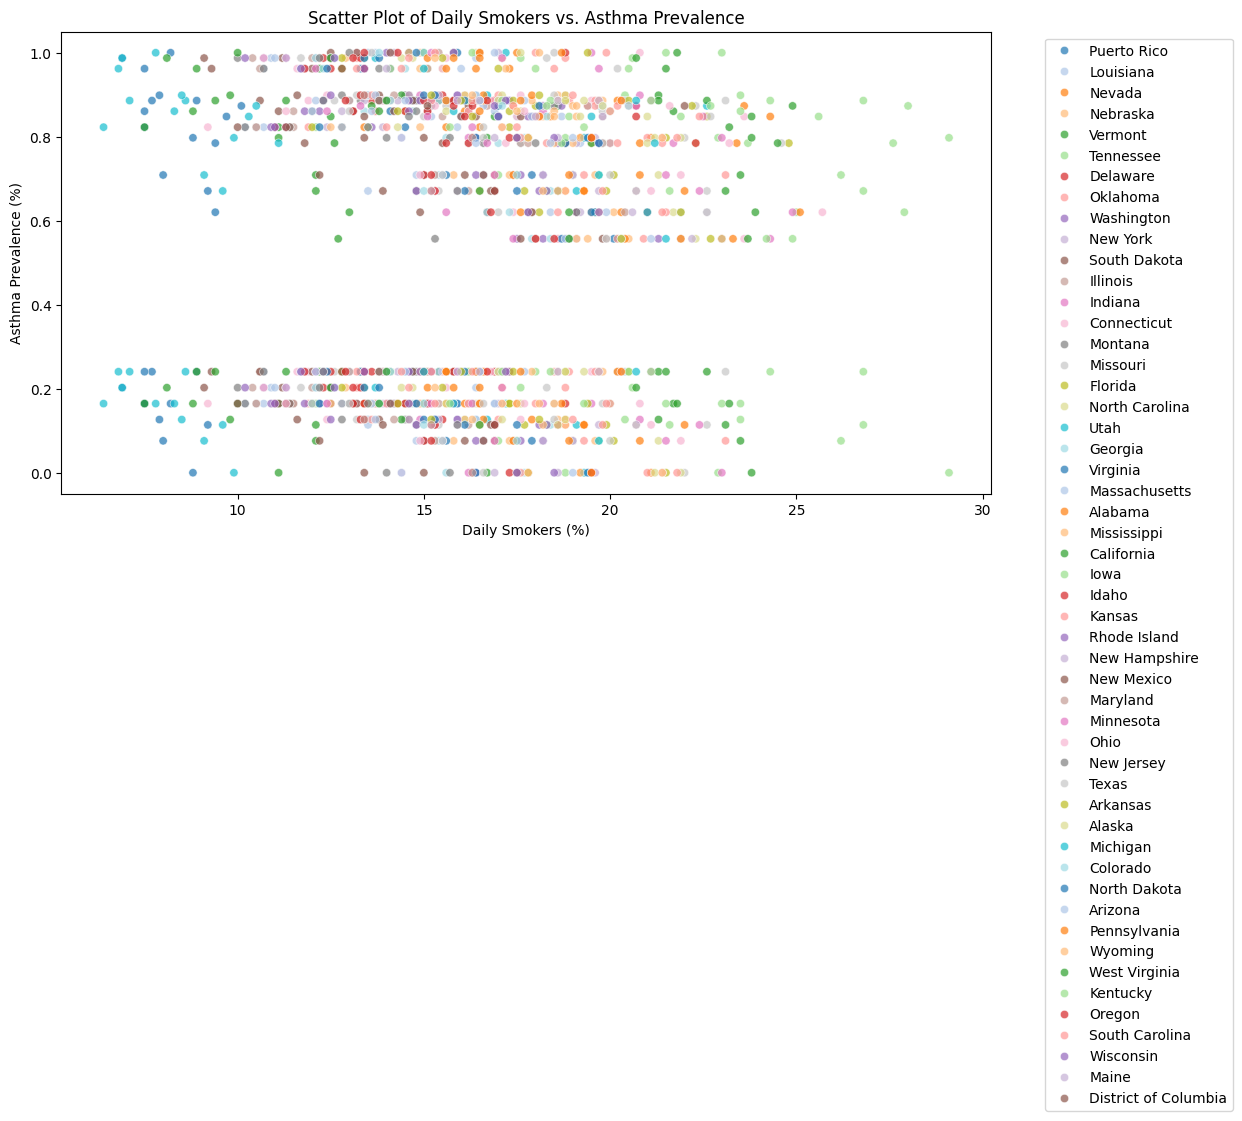

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Daily Smokers vs. Asthma Prevalence
plt.figure(figsize=(12, 6))
sns.scatterplot(data=final_merged_data, x='Daily_Smokers', y='Asthma_Prevalence', hue='State', palette='tab20', alpha=0.7)
plt.title('Scatter Plot of Daily Smokers vs. Asthma Prevalence')
plt.xlabel('Daily Smokers (%)')
plt.ylabel('Asthma Prevalence (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Interpretation

The scatter plot illustrates the relationship between daily smokers and asthma prevalence across different states. There seems to be a slight positive correlation, suggesting that states with higher rates of daily smokers might also have higher asthma prevalence. However, the relationship is not very strong, and there's a lot of variability within each state. This indicates that while smoking could be a contributing factor to asthma, other factors likely play a significant role as well.

Line plot of Asthma Prevalence Over Years by State

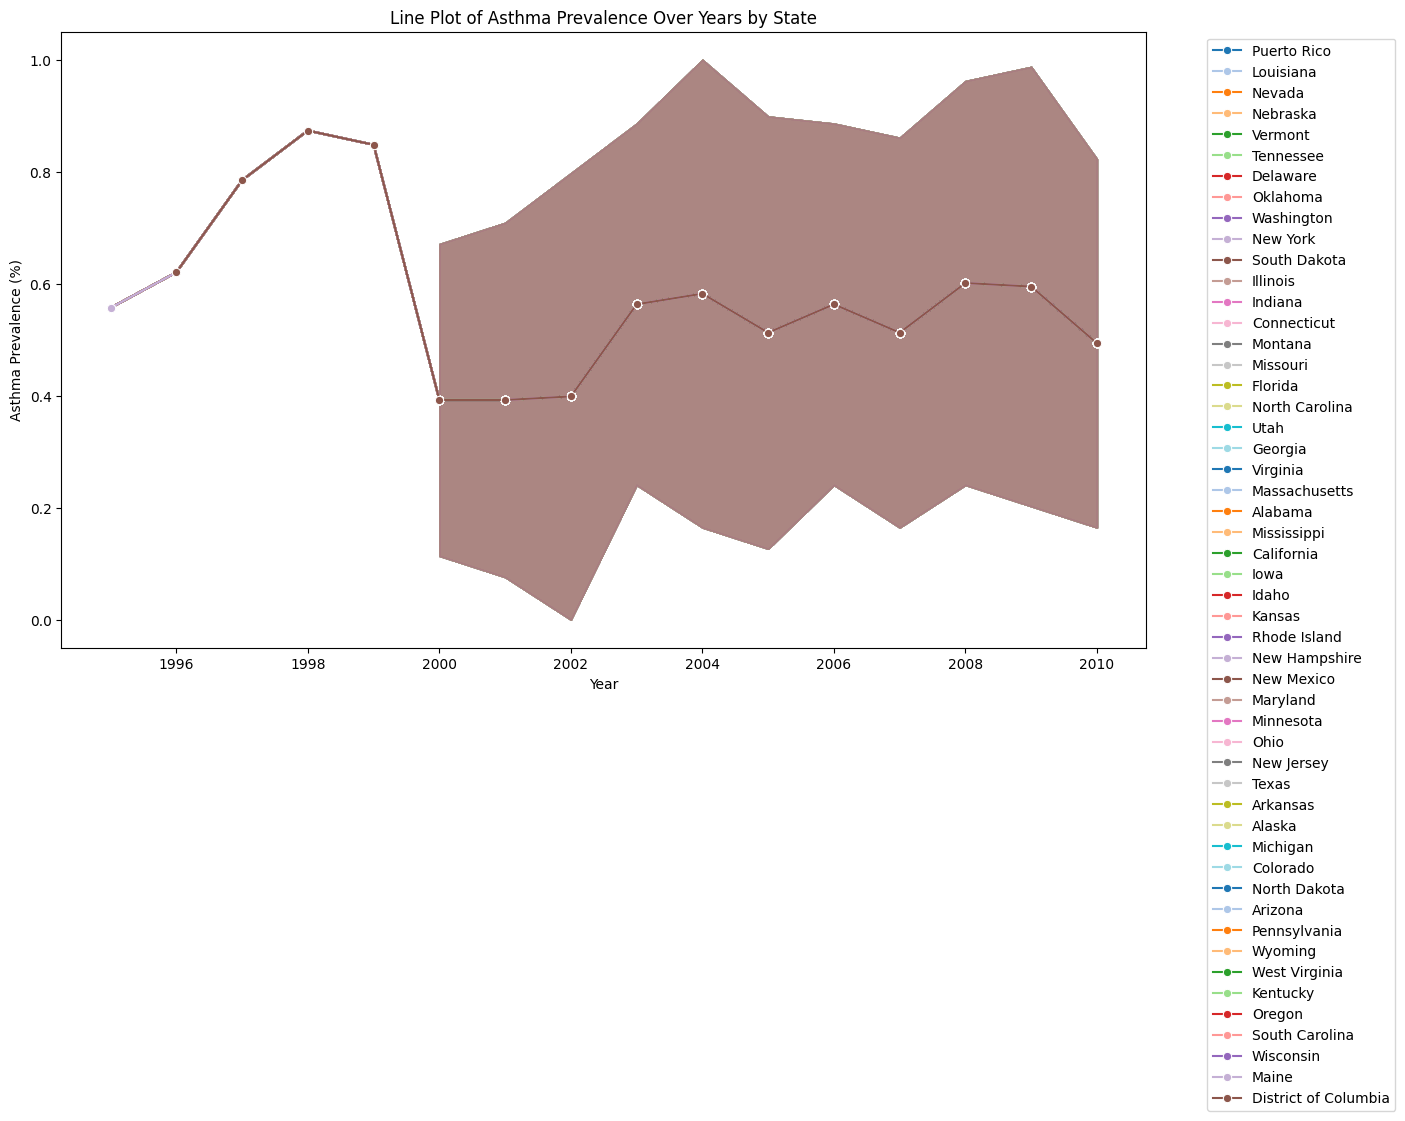

In [78]:
# Line plot of Asthma Prevalence Over Years by State
plt.figure(figsize=(14, 8))
sns.lineplot(data=final_merged_data, x='Year', y='Asthma_Prevalence', hue='State', palette='tab20', marker='o')
plt.title('Line Plot of Asthma Prevalence Over Years by State')
plt.xlabel('Year')
plt.ylabel('Asthma Prevalence (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Interpretation

The line plot displays the trend of asthma prevalence across different states over the years. It reveals that asthma prevalence has been generally increasing in most states, with some fluctuations. There are a few states where the prevalence seems to have stabilized or even decreased slightly. The plot also highlights the variability in asthma prevalence across states, with some states consistently having higher rates than others. This suggests that factors beyond the time period may be influencing asthma prevalence.

Box plot of Asthma Prevalence by Smoking Categories

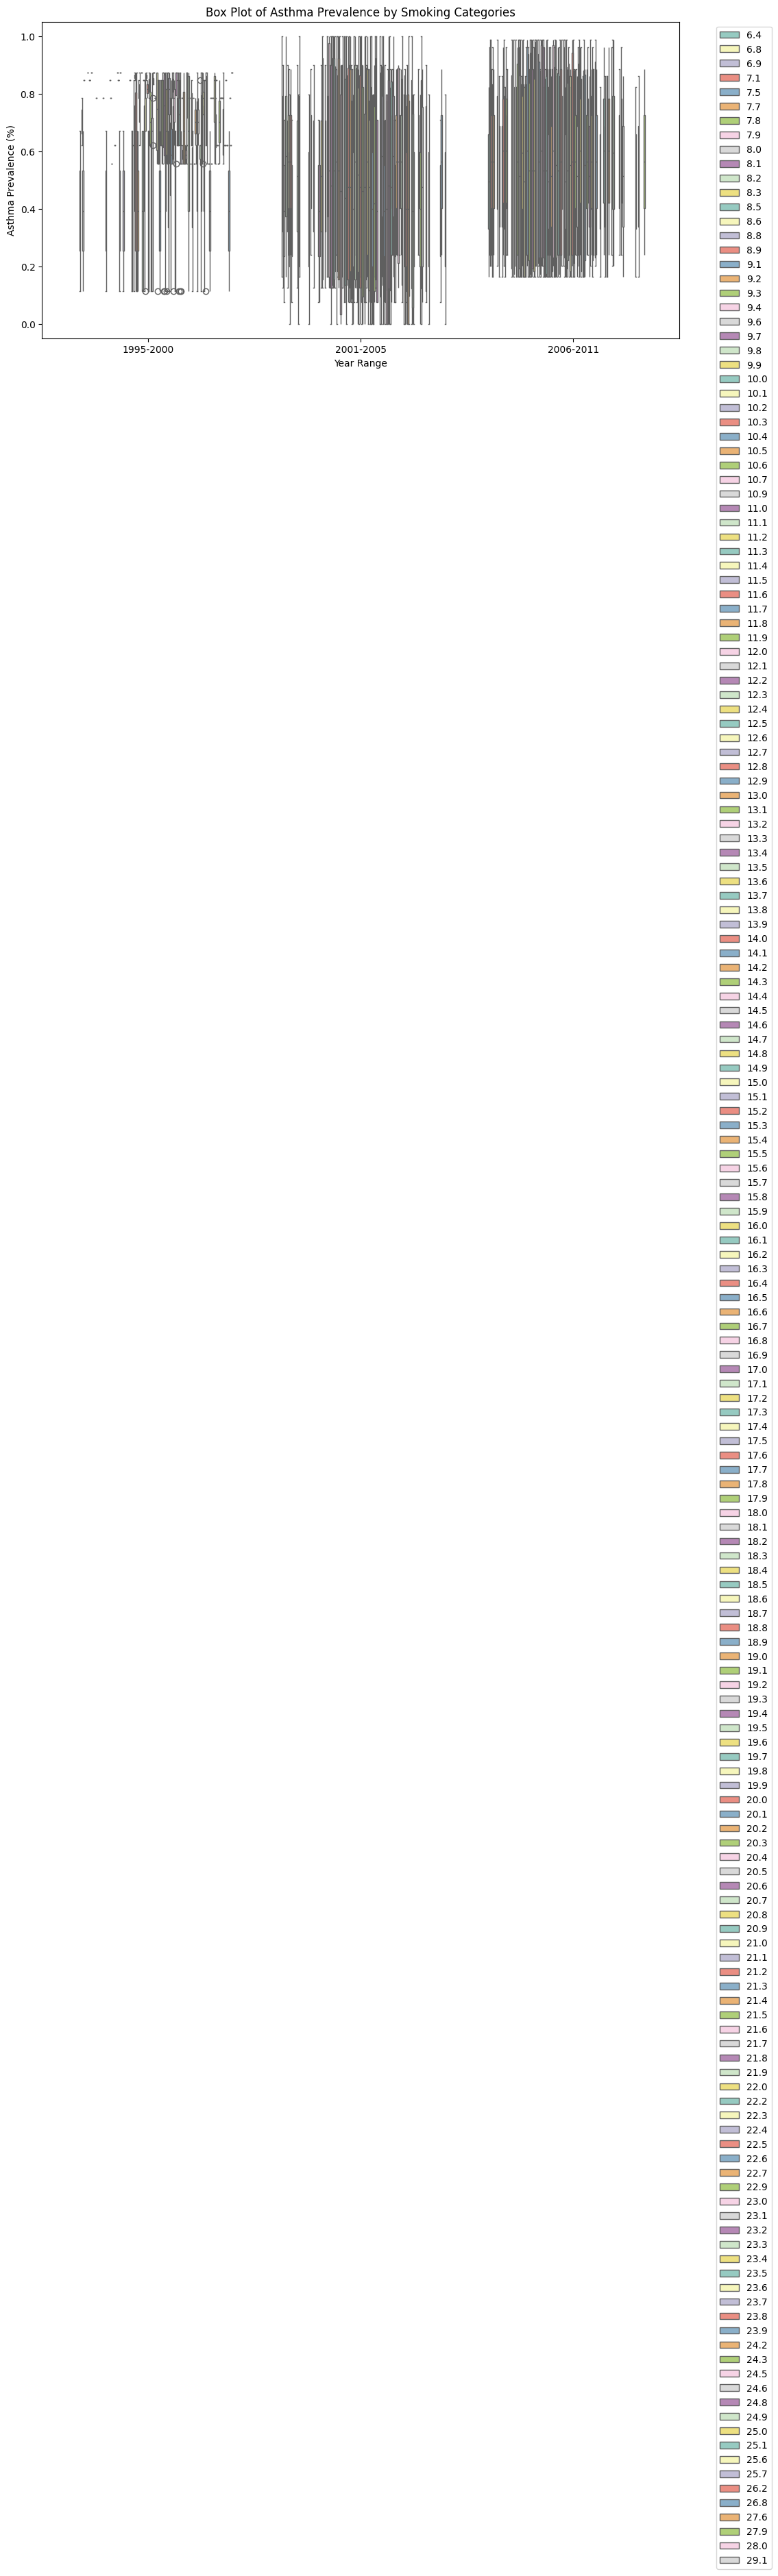

In [79]:
# Box plot of Asthma Prevalence by Smoking Categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_merged_data, x='Year_Range', y='Asthma_Prevalence', hue='Daily_Smokers', palette='Set3')
plt.title('Box Plot of Asthma Prevalence by Smoking Categories')
plt.xlabel('Year Range')
plt.ylabel('Asthma Prevalence (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Interpretation

The box plot reveals a potential association between daily smoking and higher asthma prevalence. Individuals who smoke daily generally exhibit a higher median asthma prevalence compared to non-smokers. However, the considerable overlap between the distributions for smokers and non-smokers suggests that smoking is not the sole determinant of asthma rates. Other factors, such as environmental conditions, socioeconomic factors, and access to healthcare, likely play significant roles in influencing asthma prevalence. Additionally, the variation in asthma prevalence across different time periods further emphasizes the complexity of factors contributing to asthma.

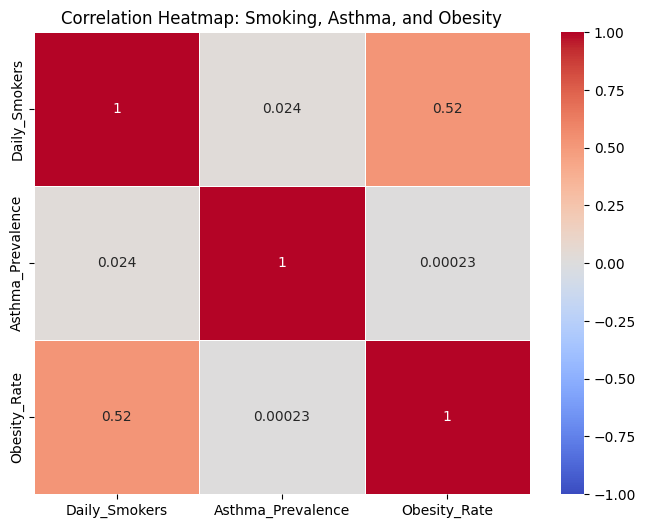

In [80]:
# Calculate the correlation matrix for selected columns
correlation_matrix = final_merged_data[['Daily_Smokers', 'Asthma_Prevalence', 'Obesity_Rate']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap: Smoking, Asthma, and Obesity')
plt.show()

Interpretation

The heatmap reveals the correlations between daily smoking, asthma prevalence, and obesity rates. There is a moderate positive correlation between daily smokers and obesity rates (0.52). A weak positive correlation exists between daily smokers and asthma prevalence (0.024). Interestingly, a very weak negative correlation is observed between asthma prevalence and obesity rates (-0.00023). This suggests that while smoking may be linked to both obesity and asthma, the relationship between asthma and obesity itself is minimal in this dataset.

Pair plot to visualize relationships between Daily Smokers, Asthma Prevalence, and Obesity Rate

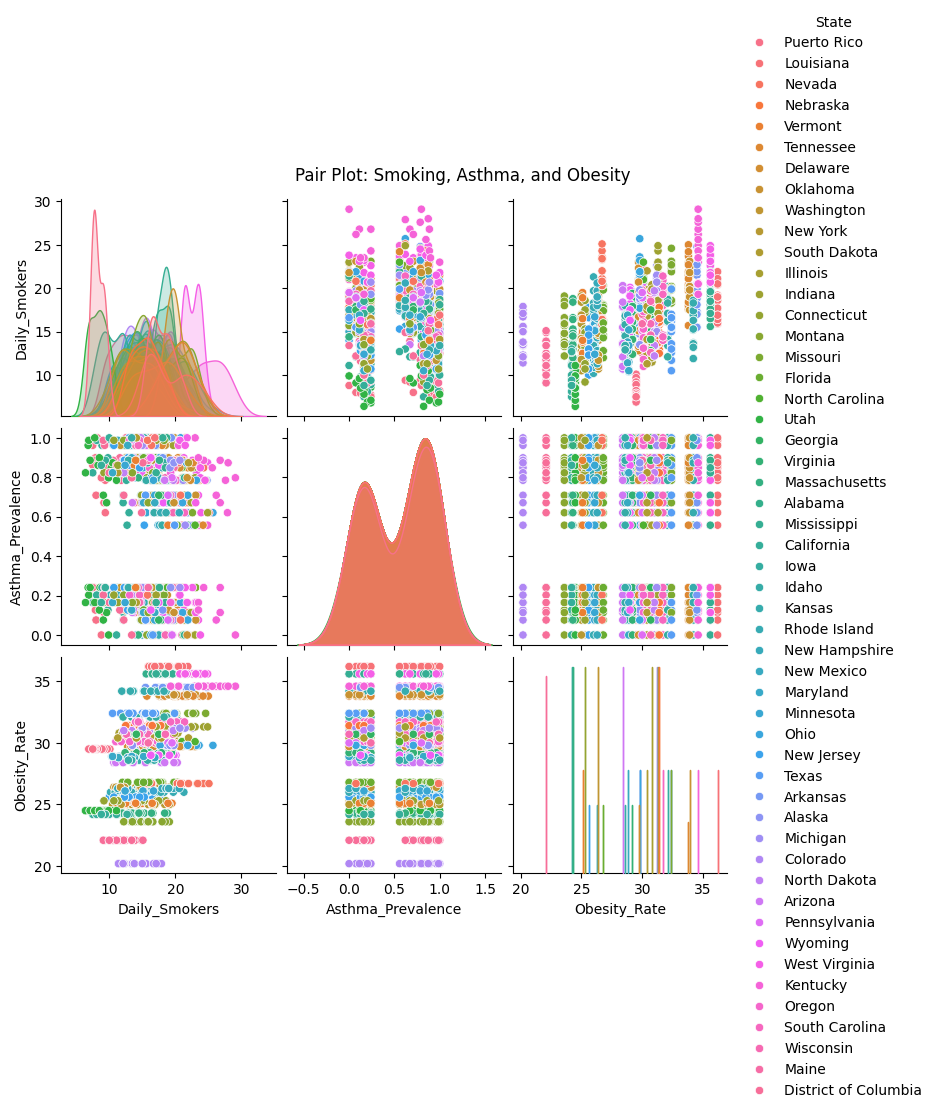

In [81]:
# Pair plot to visualize relationships between Daily Smokers, Asthma Prevalence, and Obesity Rate
sns.pairplot(final_merged_data, vars=['Daily_Smokers', 'Asthma_Prevalence', 'Obesity_Rate'], hue='State', kind='scatter')
plt.suptitle('Pair Plot: Smoking, Asthma, and Obesity', y=1.02)
plt.show()

Interpretatiom

The pair plot visualizes the relationships between daily smokers, asthma prevalence, and obesity rates. It reveals that while daily smokers tend to have higher obesity rates, the relationship between daily smokers and asthma prevalence is less clear. Additionally, there's a weak association between asthma prevalence and obesity rates. The plot also highlights the variability in these factors across different states, suggesting that state-specific factors influence these relationships.

Conclusion

This analysis integrates data on smoking, asthma, and obesity to uncover trends and correlations between health behaviors and conditions. By cleaning, merging, and transforming datasets, meaningful insights emerge, such as the relationship between smoking prevalence and asthma or the distribution of obesity rates across states and years. The categorization of obesity rates and derived metrics like the smoker-to-non-smoker ratio facilitate targeted visualization and deeper exploration. This framework demonstrates how structured analysis can drive public health strategies by identifying high-risk populations, evaluating trends over time, and informing policy interventions aimed at improving health outcomes and reducing preventable chronic diseases.

OVERALL OBSERVATIONS AND POTENTIAL INTRAVENTIONS

Potential Healthcare Applications:

Overall:
This analysis provides valuable insights into the relationship between smoking, obesity, and asthma prevalence. These insights can be used to inform public health policies, improve healthcare delivery, and ultimately reduce the burden of asthma in the population.

 * Develop and implement targeted smoking cessation programs: Focus on populations with high smoking rates and high asthma prevalence.
 * Promote public health campaigns: Raise awareness about the risks of smoking and its potential impact on asthma.
 * Prioritize resource allocation: Direct more resources towards areas with higher asthma prevalence for improved access to asthma care and treatment.
 * Conduct further research: Investigate the complex interplay of factors contributing to asthma, including genetic, environmental, and socioeconomic factors.
 * Utilize data for monitoring and evaluation: Track asthma prevalence over time to assess the effectiveness of prevention and treatment programs.
 * Integrate asthma screening and management into primary care: Encourage regular asthma screening and provide comprehensive management plans for patients with asthma.
 * Collaborate with community organizations: Partner with local organizations to address social determinants of health that contribute to asthma risk.

